<a href="https://colab.research.google.com/github/esmaeilifardi/adaboost/blob/main/adaboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('mushroom_csv.csv')
df = pd.DataFrame(df)

In [ ]:
df.head(5)

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e


In [ ]:
df.shape

(8124, 23)

In [ ]:
df.isnull().sum()

cap-shape                      0
cap-surface                    0
cap-color                      0
bruises%3F                     0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
class                          0
dtype: int64

In [ ]:
df2 = df.drop('stalk-root', axis=1)

In [ ]:
df2.isnull().sum()

cap-shape                   0
cap-surface                 0
cap-color                   0
bruises%3F                  0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
class                       0
dtype: int64

In [ ]:
df2.columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises%3F', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-surface-above-ring', 'stalk-surface-below-ring',
       'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type',
       'veil-color', 'ring-number', 'ring-type', 'spore-print-color',
       'population', 'habitat', 'class'],
      dtype='object')

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 8124 non-null   object
 1   cap-surface               8124 non-null   object
 2   cap-color                 8124 non-null   object
 3   bruises%3F                8124 non-null   object
 4   odor                      8124 non-null   object
 5   gill-attachment           8124 non-null   object
 6   gill-spacing              8124 non-null   object
 7   gill-size                 8124 non-null   object
 8   gill-color                8124 non-null   object
 9   stalk-shape               8124 non-null   object
 10  stalk-surface-above-ring  8124 non-null   object
 11  stalk-surface-below-ring  8124 non-null   object
 12  stalk-color-above-ring    8124 non-null   object
 13  stalk-color-below-ring    8124 non-null   object
 14  veil-type               

In [ ]:
df2.describe()

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,6,4,10,2,9,2,2,2,12,2,...,9,9,1,4,3,5,9,6,7,2
top,x,y,n,f,n,f,c,b,b,t,...,w,w,p,w,o,p,w,v,d,e
freq,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,...,4464,4384,8124,7924,7488,3968,2388,4040,3148,4208


target is balanced

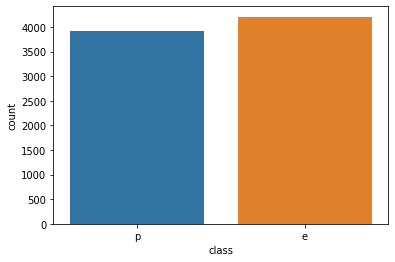

In [ ]:
sns.countplot(data=df2, x='class')

In [ ]:
df2.describe().transpose().reset_index().sort_values('unique') #a is one of des column & b is one of des column

,index,count,unique,top,freq
14,veil-type,8124,1,p,8124
21,class,8124,2,e,4208
3,bruises%3F,8124,2,f,4748
5,gill-attachment,8124,2,f,7914
6,gill-spacing,8124,2,c,6812
7,gill-size,8124,2,b,5612
9,stalk-shape,8124,2,t,4608
16,ring-number,8124,3,o,7488
15,veil-color,8124,4,w,7924
11,stalk-surface-below-ring,8124,4,s,4936


In [ ]:
des = df2.describe().transpose().reset_index().sort_values('unique')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text major ticklabel objects>)

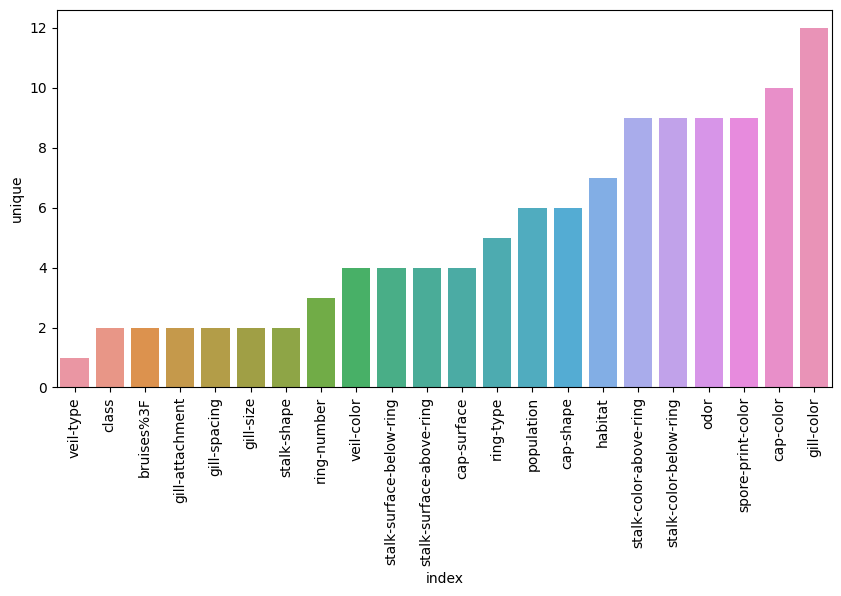

In [ ]:
plt.figure(figsize=(10,5), dpi=100)
sns.barplot(data=des, x='index', y='unique')
plt.xticks(rotation=90) #rotate x labels

In [ ]:
df2.drop('veil-type', axis=1, inplace=True) #becouse that is only 1 unique

In [ ]:
X = df2.drop('class', axis=1)
X = pd.get_dummies(X, drop_first=True)
y = df2['class']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.15, random_state=101)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
model = AdaBoostClassifier(n_estimators=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           e       0.96      0.81      0.88       655
           p       0.81      0.96      0.88       564

    accuracy                           0.88      1219
   macro avg       0.88      0.88      0.88      1219
weighted avg       0.89      0.88      0.88      1219



In [ ]:
model.feature_importances_

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.])

In [ ]:
model.feature_importances_.argmax()  #find maximum index for maximum important feature

22

In [ ]:
X.columns[22] #important feature coulmns name

'odor_n'

In [ ]:
df2['odor'].unique()

array(['p', 'a', 'l', 'n', 'f', 'c', 'y', 's', 'm'], dtype=object)

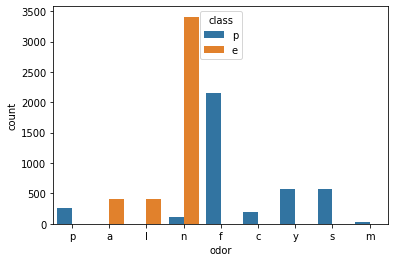

In [ ]:
sns.countplot(data= df2, x = 'odor', hue='class') # _n is for get_dummies
# all predict are true odor n is not findable

In [ ]:
len(X.columns) #because adaboost work with 1 feature

91

In [ ]:
error_rates = []

for i in range(1, 92):
  model = AdaBoostClassifier(n_estimators=i)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  error = 1-accuracy_score(y_pred, y_test)
  error_rates.append(error)  # 2 to 1


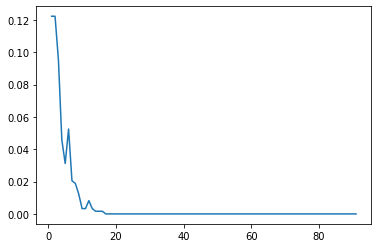

In [ ]:
plt.plot(range(1, 92), error_rates)  # error not decress after ~10   elbow method

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
b = []
b.append(range(1,92))
b

[range(1, 92)]

In [ ]:
params = {'n_estimators': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]}
grid_model = GridSearchCV(model, param_grid = params)


In [ ]:
grid_model.fit(X_train, y_train)           # dar cross_val_score dar aval miayad na aval

y_pred = grid_model.predict(X_test)

accuracy_score(y_pred, y_test)

0.9967186218211649

In [ ]:
grid_model.best_params_

{'n_estimators': 10}

In [ ]:
grid_model.best_estimator_

AdaBoostClassifier(n_estimators=10)

In [ ]:
feature_importances = pd.DataFrame(data = model.feature_importances_, index= X.columns, columns= ['feature_importances'] )

In [ ]:
feature_importances = feature_importances[feature_importances['feature_importances']>0] # Coefficients > 0

In [ ]:
feature_importances

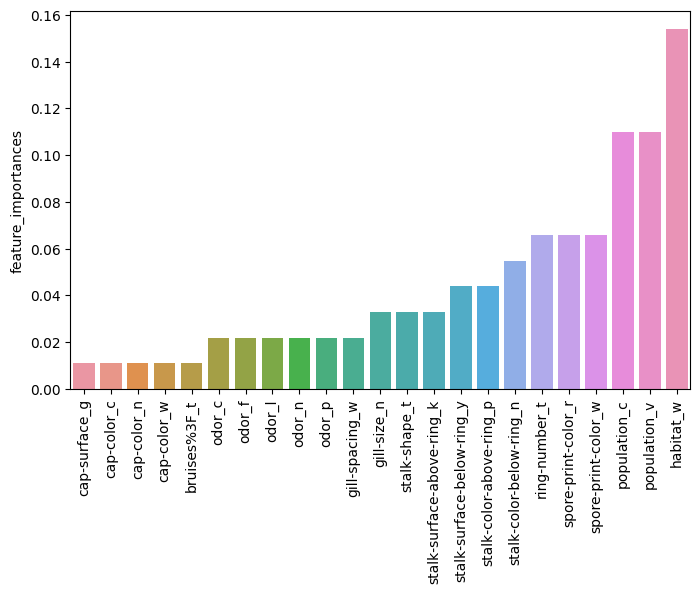

In [ ]:
plt.figure(figsize=(8,5), dpi=100)
sns.barplot(data= feature_importances.sort_values('feature_importances'), x=feature_importances.index, y='feature_importances')
plt.xticks(rotation=90);